# CODE-DE/EO-Lab tutorial

<div style="text-align: right"><i> Beginner </i></div>

***
<center><h1> Ein simples Skript zum Deep Learning mit Tensorflow </h1></center>

***
**General Note 1**: Ausführung der Zellen durch pressen des <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button vom top MENU (oder `Shift` + `Enter`).<br>
<br>
**General Note 2**: Falls der Kern nich mehr arbeitet, im the top MENU, klicke <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Dann, im top MENU, clicke  "Run" aund wähle "Run All Above Selected Cell".<br>

**General Note 3**: Schauen Sie sich im [**FORUM**](https://forum.code-de.org/de/) um oder Kontaktieren Sie den Support ! <br>

***



Es werden Daten vom MNIST digits classification dataset genutzt.
Siehe auch: https://keras.io/api/datasets/mnist/ oder https://www.tensorflow.org/tutorials/quickstart/beginner

In [3]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 35.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 64.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 173.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB

In [6]:

from tensorflow.python.client import device_lib

Schauen wir ersteimal welche Hardware wir nutzen:

In [7]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


Check welche Software Version installiert ist:

In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


Lade den Datensatz von KERAS

In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#let's hava a look at the dimensions
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


Die Daten sind in Traings und Valiedierungsdaten aufgeteilt. Wir habe 60000 Validirungsdaten als Bilder mit 28 x 28 Pixeln und 10000 Test Bildern.
Dazu gibt es die entsprechende 'Label', als was dem Bild als Klassifikationswert zugeornet ist.
Die nächste Zelle zeigt den i-ten Traingsdatensatz (i=1..60000). Bei den Labels hadelt es ich um Zahlen 0..10 die in den Bildern mehr oder weniger Klar prepersentiert sind und vom Modell gelernt werden sollen.
Im unteren Beispiel die Zahl 4.

4


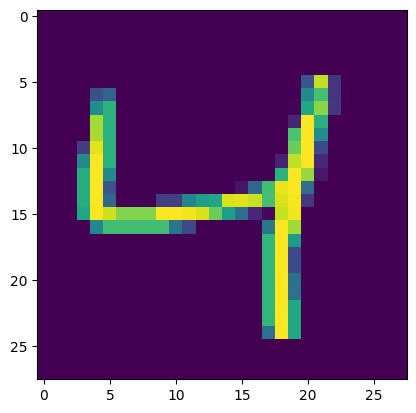

<Axes: >

In [12]:
#let's have a look at the data..
import numpy
from rasterio.plot import show
 
i=2
print(y_train[i])
show(x_train[i,:,:])


Definition des Modells:

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Im Folgenden wird das Modell trainiert und angewendet. Spielen Sie mit den Parametern. Mehr Informationen gibt es hier: https://keras.io/examples/vision/mnist_convnet/

In [15]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-1.0569695 ,  0.09055883, -0.10272817, -0.10423596,  0.04554312,
        -0.18239498, -0.08876677, -1.1924422 ,  0.06889784, -1.0403029 ]],
      dtype=float32)

In [16]:
tf.nn.softmax(predictions).numpy()

array([[0.04473138, 0.14092161, 0.11615398, 0.11597897, 0.13471858,
        0.10725939, 0.11778702, 0.03906405, 0.13790192, 0.04548315]],
      dtype=float32)

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [18]:
loss_fn(y_train[:1], predictions).numpy()

2.2325056

In [19]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8589 - loss: 0.4694
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9562 - loss: 0.1488
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9655 - loss: 0.1096
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9729 - loss: 0.0889
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0724


In [21]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9778 - loss: 0.0696


[0.06961560249328613, 0.9778000116348267]

In [22]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.51343144e-07, 6.88900226e-09, 2.48725473e-06, 5.25515061e-05,
        3.76595526e-11, 3.47946695e-07, 9.55671740e-13, 9.99920964e-01,
        1.77467939e-06, 2.16806420e-05],
       [4.02007450e-09, 7.68995204e-04, 9.99228835e-01, 1.05094136e-06,
        3.56395813e-18, 1.13814326e-06, 8.58790372e-09, 4.58770324e-15,
        5.28107655e-08, 1.31286970e-16],
       [6.35542904e-07, 9.99127805e-01, 1.57928036e-04, 6.61017202e-06,
        3.94377530e-05, 2.39270844e-06, 3.11254626e-05, 5.98071609e-04,
        3.58266552e-05, 1.64264335e-07],
       [9.99982953e-01, 8.96299215e-11, 1.46686045e-06, 6.14902218e-09,
        4.52132127e-08, 5.37382192e-08, 1.44984215e-05, 4.47089064e-07,
        3.23280025e-09, 5.59915975e-07],
       [3.00034253e-06, 4.19847801e-08, 9.69844314e-06, 8.66228689e-08,
        9.97640967e-01, 3.84619284e-07, 8.15900512e-06, 9.66722655e-05,
        3.65369669e-06, 2.23735394e-03]], dtype=float32)>

In [23]:
print(predictions)

[[-1.0569695   0.09055883 -0.10272817 -0.10423596  0.04554312 -0.18239498
  -0.08876677 -1.1924422   0.06889784 -1.0403029 ]]
